# PIT - Práctica 1: Análisis de Series Temporales - Modelos Clásicos

**Alicia Lozano Díez**

19 de febrero de 2024

**Equipo 12**

**Lucas Juez Stapleton**

**Alvaro Arranz**



## Objetivo

El objetivo de esta práctica es proporcionar una introducción al procesamiento y análisis de señales temporales: descomposición de una serie temporal para el estudio de sus propiedades, ajuste de modelos lineales (ARIMA) y predicción.

### Materiales - Moodle

- Guión (.ipynb) de la práctica
- Datos (.csv): bases de datos _AirPassengers.csv_ y _stocks_1yr.csv_.


# 1. Introducción al procesamiento de señales temporales: Air Passengers

## 1.1. Cargar los datos en Google Colab y manejo de los datos en Python

Primero vamos a descargar el fichero con los datos de la base de datos *AirPassengers.csv* de Moodle, que contiene los datos del número de pasajeros de una aerolínea para un periodo de tiempo.

Las siguientes líneas de código nos permitirán subir el archivo a Google Colab desde el disco local:

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AirPassengers.csv to AirPassengers.csv


A continuación, vamos a leer el fichero *AirPassengers.csv* en Python, con la ayuda de la librería *pandas*.

Lo cargaremos haciendo uso también del módulo de Python *datetime* para operar con este tipo de datos de forma cómoda.

La función definida *parser* nos permitirá cambiar el formato de fecha/tiempo al formato que esperamos encontrar en nuestra base de datos.

In [ ]:
from pandas import read_csv
from datetime import datetime

def parser(x):
	return datetime.strptime(x, '%Y-%m')

data = read_csv('AirPassengers.csv', header=0, parse_dates=[0], index_col=0,
                squeeze=True, date_parser=parser)
print(data.head())

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64


<ipython-input-3-1eb971806bed>:7: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  data = read_csv('AirPassengers.csv', header=0, parse_dates=[0], index_col=0,


Podemos visualizar cómo está indexada la estructura de datos, así como el número de datos que tiene nuestra serie temporal.

In [ ]:
data.index


DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

Si queremos acceder a un dato en concreto, por ejemplo, el número de pasajeros del mes de marzo de 1949, podemos hacerlo de la siguiente forma:

In [ ]:
data['1949-03-01']


132

O de esta otra:

In [ ]:
data[datetime(1949,3,1)]

132

## 1.2. Representación de los datos


El primer paso para analizar una serie temporal es obtener una representación de los datos, para poder hacernos una idea de las características de la serie de forma visual.

Para ello, podemos utilizar la librería *matplotlib* como sigue:

Text(0.5, 1.0, 'Serie temporal: Air Passengers')

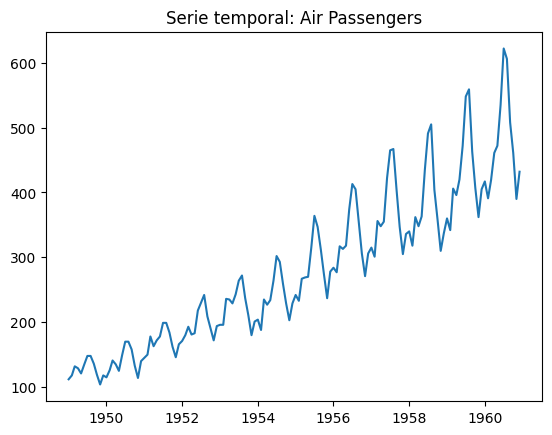

In [ ]:
from matplotlib import pyplot as plt
plt.plot(data)
plt.title('Serie temporal: Air Passengers')

## 1.3. Estudio de la estacionariedad de la serie


Algunos de los modelos de análisis de series temporales asumen estacionariedad en las series. Por ello, vamos a ver dos métodos para comprobar si una serie es estacionaria.

Uno de ellos es un análisis más visual: calculamos la media y desviación estándar "móviles" (con una ventana deslizante).

In [ ]:
import pandas as pd

def test_stationarity_1(timeseries,window_size):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=window_size).mean()
    rolstd = timeseries.rolling(window=window_size).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

El segundo método consiste en el test estadístico Dickey-Fuller:

In [ ]:
import pandas as pd

from statsmodels.tsa.stattools import adfuller
def test_stationarity_2(timeseries):
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [ ]:
def test_stationarity(timeseries,window_size):
  test_stationarity_1(timeseries,window_size)
  test_stationarity_2(timeseries)

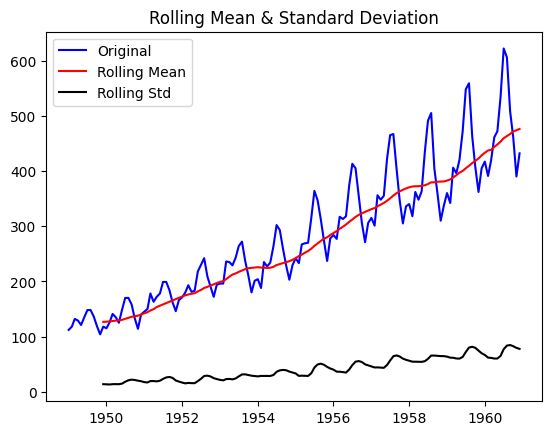

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [ ]:
test_stationarity(data,12)

**PREGUNTAS**

1.   ¿Qué conclusiones puede extraer del análisis de estacionariedad de la serie original?
2.   ¿Qué diferencias observas al variar el tamaño de la ventana para hacer las medias móviles? Prueba con un par de tamaños, incluye las gráficas obtenidas y explica las diferencias visuales que aprecias.

1) Es no estacionaria ya que tiene tendencia, la cual se ve que es creciente, y estacionalidad, como veremos a continuación. Se puede decir que tiene una tendencia ascendente, es decir positiva, una estacionalidad anual periodica pero con ligeros cambos de ser mayor en sus picos mas altos respecto a sus puntos mas bajos. Como es una señal no estacionaria se puede concluir que es no estable, ya que como se ve, ascendera al infinito segun avanza en el tiempo segun continua en la tendencia. Como tiene tendencia y estacionalidad, se puede decir que tiene un modelo SARIMA.

2) Probamos a dibujar los distintos tamaños

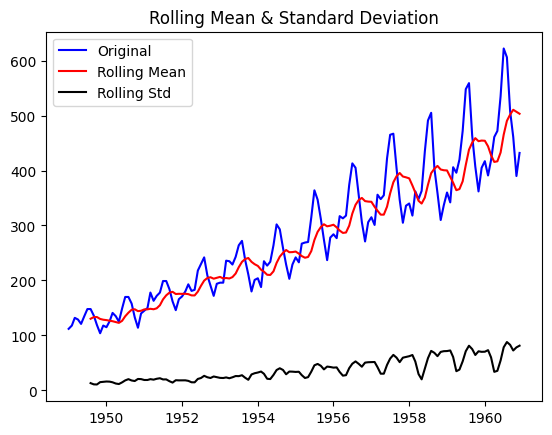

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


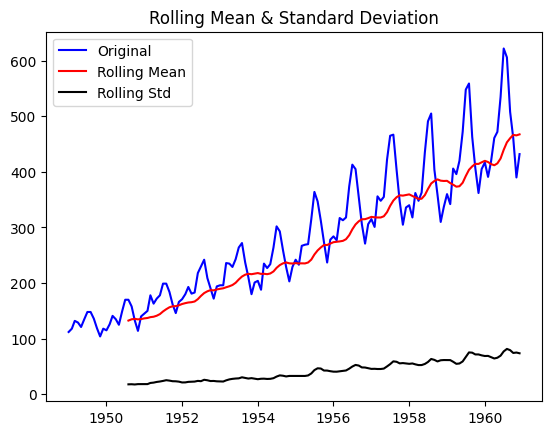

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


(None, None)

In [ ]:
test_stationarity(data,8), test_stationarity(data,20)

Para un tamaño de ventana menor (8) hay una mayor desviacion tipica y la media se ve mas alterada que en la original (12), pero se aprecia una cierta periodicidad en la media de la ventana de menor tamaño. Mientras que en un tamaño de ventana mayor (20) la desviación tipica se suaviza y parece mas una recta que en las otras pero tambien se aprecia mas la periodicidad de la media respecto a la ventana de tamaño original 12. Pero en todos se sigue conservando la tendencia positiva ascendente.

## 1.4. Transformar una serie temporal en estacionaria

Como hemos visto en la teoría, para analizar la serie y poder ajustarle un modelo tipo AR, MA o ARMA, esperamos que la serie a modelar sea estacionaria.

Para conseguir una serie lo más estacionaria posible, podemos aplicar distintas transformaciones de la serie original. Vamos a ver algunos ejemplos:

a) *Transformaciones simples para reducir el efecto de la tendendia*:

En el caso de los datos del ejemplo, la tendencia es positiva, por lo que podemos aplicar alguna transformación que penalice los valores más altos y menos los más bajos. Es el caso del logaritmo, la raíz cuadrada, etc.

**PREGUNTA**


1.   Representa a continuación la serie aplicándole una transformación logarítmica. ¿Qué observas?



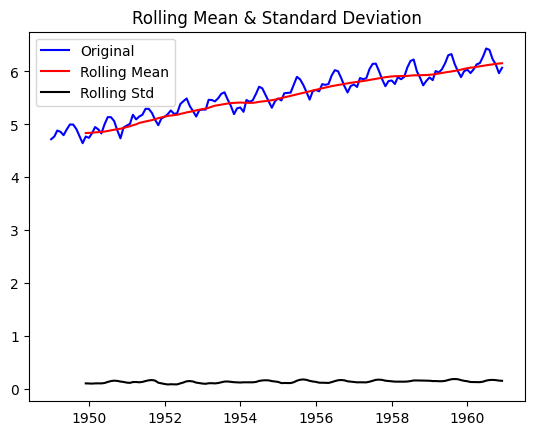

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import adfuller
# Transformación logarítmica
log_data = np.log(data)
# Llamada a la función con la serie logarítmica
test_stationarity(log_data, 12)

Se puede observar una menor tendencia que en el caso anterior, aunque sigue cierta tendencia.


En casos más complejos en los que la tendencia no se ve clara (sobre todo en presencia de ruido), se pueden aplicar otros métodos. Uno de ellos es el suavizado como las medias móviles (*moving average*).

Por ejemplo, podemos aplicar un suavizado con una media con ventana deslizante que tenga en cuenta un año (12 meses).
Ten en cuenta, que esto implicará que para calcular la media de las primeras muestras, no tengo suficientes datos para la ventana. Esto lo podemos ver en la salida de la media móvil (tendremos que eliminar los *NaN* que aparecen).


**PREGUNTAS**


1.   Aplica dicha media móvil y represéntala junto a los datos. Puede utilizar los datos en escala logarítmica. ¿Esta media móvil representa claramente la tendencia de la serie?

2.   Elimina ahora de la serie original (transformada con el logaritmo si es como la has calculado previamente) la influencia de esta media móvil y representa el resultado. ¿Qué observas ahora?

3.   Realiza el test de estacionariedad de la serie resultante y compáralo con el de la serie original. ¿Qué conclusiones puedes obtener tanto del test visual como del test estadístico?






1) Para aplicar una media móvil con una ventana deslizante de 12 meses y representarla junto con los datos, puedes utilizar la función rolling de Pandas para calcular la media móvil y luego trazar ambas series en un gráfico.

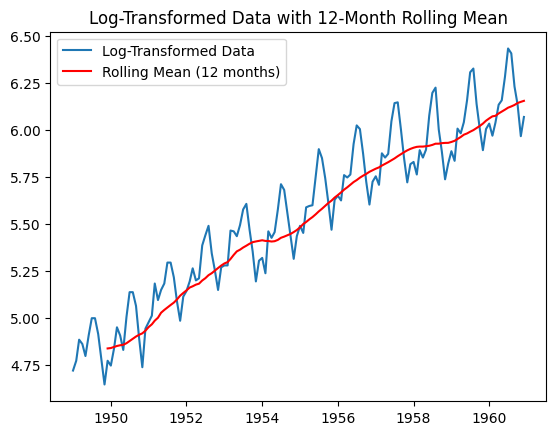

Results of Dickey-Fuller Test:
Test Statistic                  -1.737158
p-value                          0.412076
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Supongamos que 'data' es tu serie temporal

# Transformación logarítmica
log_data = np.log(data)

# Aplicar media móvil con ventana de 12 meses
rolling_mean = log_data.rolling(window=12).mean()

# Eliminar los NaN resultantes de la media móvil
rolling_mean = rolling_mean.dropna()

# Visualizar la serie original y la media móvil
plt.plot(log_data, label='Log-Transformed Data')
plt.plot(rolling_mean, color='red', label='Rolling Mean (12 months)')
plt.legend(loc='best')
plt.title('Log-Transformed Data with 12-Month Rolling Mean')
plt.show()

# Realizar la prueba de Dickey-Fuller en la serie con media móvil
test_stationarity_2(rolling_mean)

Este código calcula la media móvil con una ventana deslizante de 12 meses y traza tanto la serie original (en escala logarítmica) como la media móvil. Además, se realiza la prueba de Dickey-Fuller en la serie con la media móvil para evaluar la estacionaridad. La media móvil representa claramente la tendencia de la serie, la cual se ve que es ascendente (como la media al ser no constante se puede decir que sigue un modelo ARIMA).



2)Para eliminar la influencia de la media móvil de la serie original, puedes restar la media móvil calculada anteriormente. Aquí tienes el código modificado para realizar esta operación y representar el resultado:

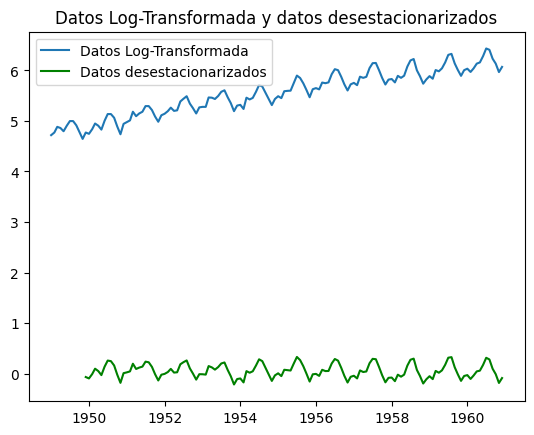

Results of Dickey-Fuller Test:


MissingDataError: exog contains inf or nans

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Supongamos que 'data' es tu serie temporal

# Transformación logarítmica
log_data = np.log(data)

# Aplicar media móvil con ventana de 12 meses
rolling_mean = log_data.rolling(window=12).mean()

# Eliminar los NaN resultantes de la media móvil
rolling_mean = rolling_mean.dropna()

# Restar la media móvil de la serie original logarítmica
deseasonalized_data = log_data - rolling_mean

# Visualizar la serie original y la serie después de eliminar la influencia de la media móvil
plt.plot(log_data, label='Datos Log-Transformada')
plt.plot(deseasonalized_data, color='green', label='Datos desestacionarizados')
plt.legend(loc='best')
plt.title('Datos Log-Transformada y datos desestacionarizados')
plt.show()

# Realizar la prueba de Dickey-Fuller en la serie desestacionalizada
test_stationarity_2(deseasonalized_data)

Este código calcula la serie desestacionalizada restando la media móvil de la serie original en escala logarítmica. Luego, se visualiza la serie original y la serie desestacionalizada, y se realiza la prueba de Dickey-Fuller en la serie desestacionalizada para evaluar la estacionaridad. Se ve que se ha eliminado la tendencia.

El error indica que la matriz de variables exógenas (exog) utilizada en la prueba de Dickey-Fuller contiene valores infinitos (inf) o valores no numéricos (nan). Esto puede ocurrir si hay valores nan o inf en la serie desestacionalizada (deseasonalized_data).

Para resolver esto, es recomendable asegurarse de que no haya valores nan o inf en la serie desestacionalizada antes de realizar la prueba de Dickey-Fuller. Puedes utilizar el método dropna() para eliminar los valores nan y también verificar si hay valores infinitos con el método np.isfinite().

Aquí está el código modificado para tratar este problema:

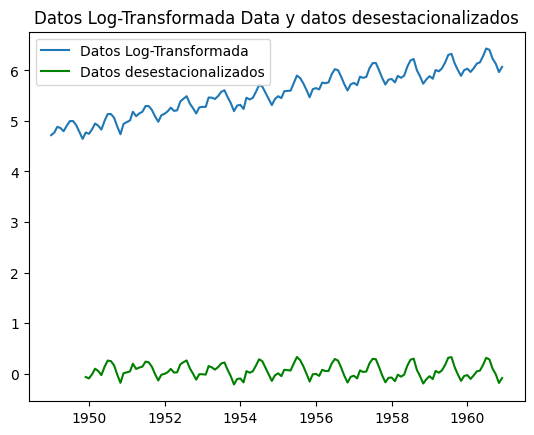

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Supongamos que 'data' es tu serie temporal

# Transformación logarítmica
log_data = np.log(data)

# Aplicar media móvil con ventana de 12 meses
rolling_mean = log_data.rolling(window=12).mean()

# Eliminar los NaN resultantes de la media móvil
rolling_mean = rolling_mean.dropna()

# Restar la media móvil de la serie original logarítmica
deseasonalized_data = log_data - rolling_mean

# Eliminar los NaN y verificar la finitud de los valores
deseasonalized_data = deseasonalized_data.dropna()
if not np.isfinite(deseasonalized_data).all():
    raise ValueError("La serie desestacionalizada contiene valores no finitos.")

# Visualizar la serie original y la serie después de eliminar la influencia de la media móvil
plt.plot(log_data, label='Datos Log-Transformada')
plt.plot(deseasonalized_data, color='green', label='Datos desestacionalizados')
plt.legend(loc='best')
plt.title('Datos Log-Transformada Data y datos desestacionalizados')
plt.show()

# Realizar la prueba de Dickey-Fuller en la serie desestacionalizada
test_stationarity_2(deseasonalized_data)

Este código verifica la finitud de los valores en la serie desestacionalizada antes de realizar la prueba de Dickey-Fuller. Asegúrate de que la serie desestacionalizada no contenga valores no finitos para evitar el error mencionado.

Lo que se puede apreciar es que la parte logaritmica sigue siendo creciente entre el eje y=4.75 y el eje y=6.5 con su estacionalidad (periodo de un año aproximadamente), y eliminando la tendencia observamos que sigue con su estacionalidad pero sin tendencia y se convierte en estacionaria alrededor del eje y=0

3) Una vez que se ha realizado el test de estacionariedad en la serie desestacionalizada y comparado los resultados con la serie original, se puede obtener conclusiones sobre la estacionariedad de los datos.

Primero, se revisa el código para realizar el test de estacionariedad en la serie desestacionalizada y compararlo con el test en la serie original:

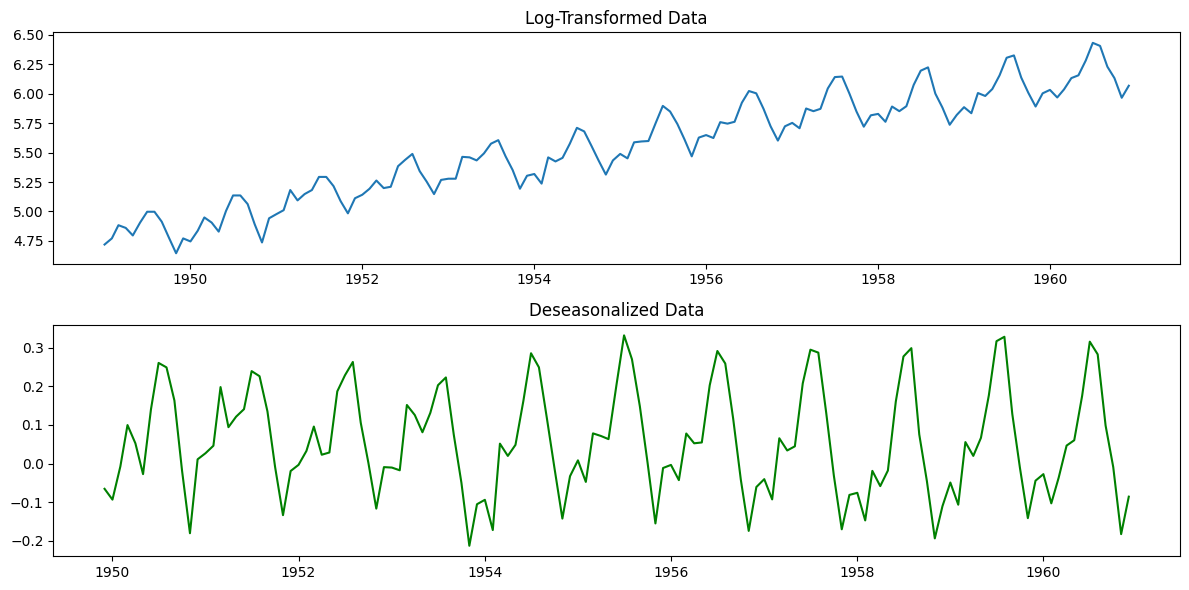


Results of Dickey-Fuller Test (Original Series):
Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64

Results of Dickey-Fuller Test (Deseasonalized Series):
Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Supongamos que 'data' es tu serie temporal

# Transformación logarítmica
log_data = np.log(data)

# Aplicar media móvil con ventana de 12 meses
rolling_mean = log_data.rolling(window=12).mean()

# Eliminar los NaN resultantes de la media móvil
rolling_mean = rolling_mean.dropna()

# Restar la media móvil de la serie original logarítmica
deseasonalized_data = log_data - rolling_mean

# Eliminar los NaN y verificar la finitud de los valores
deseasonalized_data = deseasonalized_data.dropna()
if not np.isfinite(deseasonalized_data).all():
    raise ValueError("La serie desestacionalizada contiene valores no finitos.")

# Visualizar la serie original y la serie después de eliminar la influencia de la media móvil
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(log_data, label='Log-Transformed Data')
plt.title('Log-Transformed Data')

plt.subplot(2, 1, 2)
plt.plot(deseasonalized_data, color='green', label='Deseasonalized Data')
plt.title('Deseasonalized Data')

plt.tight_layout()
plt.show()

# Realizar la prueba de Dickey-Fuller en la serie original
print("\nResults of Dickey-Fuller Test (Original Series):")
test_stationarity_2(log_data)

# Realizar la prueba de Dickey-Fuller en la serie desestacionalizada
print("\nResults of Dickey-Fuller Test (Deseasonalized Series):")
test_stationarity_2(deseasonalized_data)

Ahora, respecto a las conclusiones:

**Visualmente:** Al observar los gráficos generados, la serie desestacionarizada muestra menos tendencia y variabilidad en comparación con la serie original, como se ha apreciado en el apartado anterior.

**Estadísticamente:** Al examinar los resultados de la prueba de Dickey-Fuller. Un p-value más bajo sugiere una mayor evidencia contra la hipótesis nula de no estacionariedad. Si el p-value es lo suficientemente bajo (usualmente menor a 0.05), se puede rechazar la hipótesis nula y considerar que la serie es estacionaria, como se observa en la segunda grafica.

En resumen, como la serie desestacionalizada es más estacionaria que la serie original, se puede concluir que eliminar la influencia de la tendencia ha contribuido a la estacionariedad de los datos. Considera tanto la evidencia visual como la estadística para obtener una comprensión completa de la estacionariedad de los datos.

b) *Diferenciar (derivar)*:

Las técnicas anteriores son sencillas y pueden eliminar parte de la influencia de la tendencia de la serie, pero no suelen ser suficientes cuando se tiene por ejemplo estacionalidad.

Diferenciar (o derivar) es uno de los métodos más comunes para eliminar la influencia de la tendencia y la estacionalidad en la serie original, mejorando las propiedades de estacionariedad de la serie.

Podemos tomar la derivada de orden uno de la siguiente manera (partimos de la serie en el dominio logarítmico):

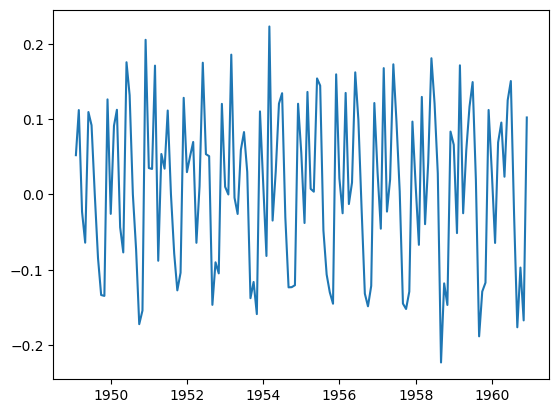

In [ ]:
data_log_diff = log_data - log_data.shift()
plt.plot(data_log_diff)

**PREGUNTAS**


1.   ¿Qué observas en la serie resultante?

Se puede apreciar cierta periodicidad/estacionales practicamente anuales con una forma similar a una M de tres picos a partir de 1954, anteriromente no se ve con claridad estacionalidad tan parecida con las otras.

2.   ¿Es esta serie estacionaria de acuerdo a los criterios anteriores?
Incluye los resultados gráficos y del test estadístico e interprétalos.

Aunque se aprecia en el siguiente codigo que el p-valor de la transformacion de los datos de forma logaritmica es practicamente estacionaria con un  p-valor=7% cuando estabamos buscando uno menor a 5%, por lo que a simple vista no se puede apreciar si es estacionaria o no, ya que a vista parece estacionaria aunque no lo parezca, ya que no se aprecia tendencia ni ascendente ni descendente. Pero con la  segunda derivada, como pide el siguiente apartado, ya obtenemos la estacionariedad.


3. Repite el proceso para una segunda derivada. ¿Qué observas ahora?

Como hemos dicho antes, se obtiene y observa a partir del codigo siguiente que con la segunda derivada es estacionaria.

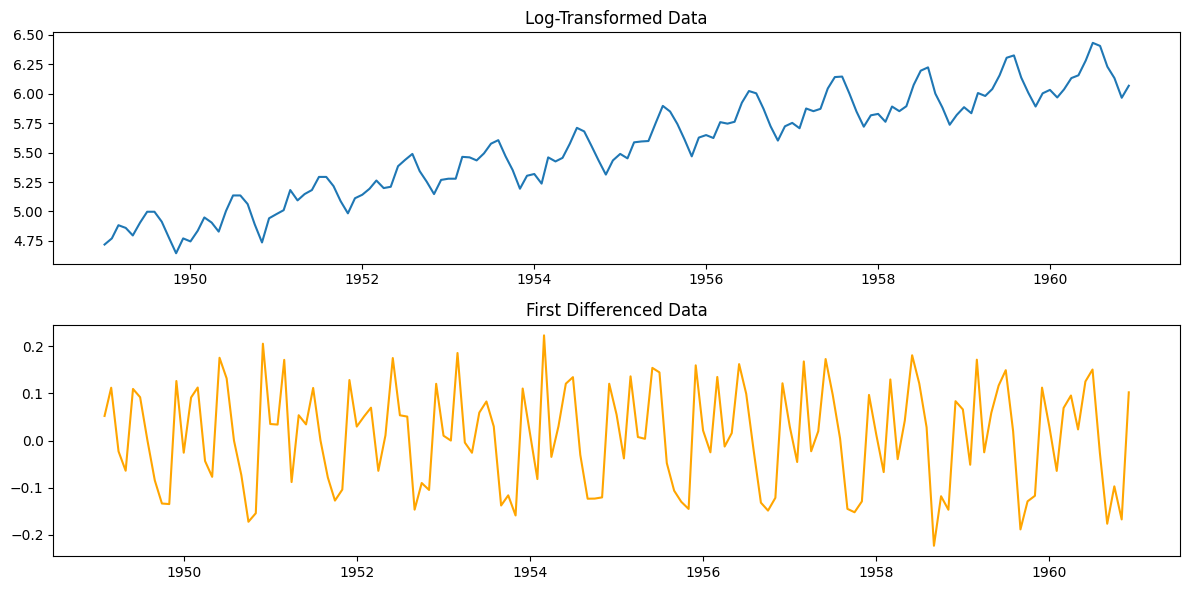


Results of Dickey-Fuller Test (First Differenced Series):
Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


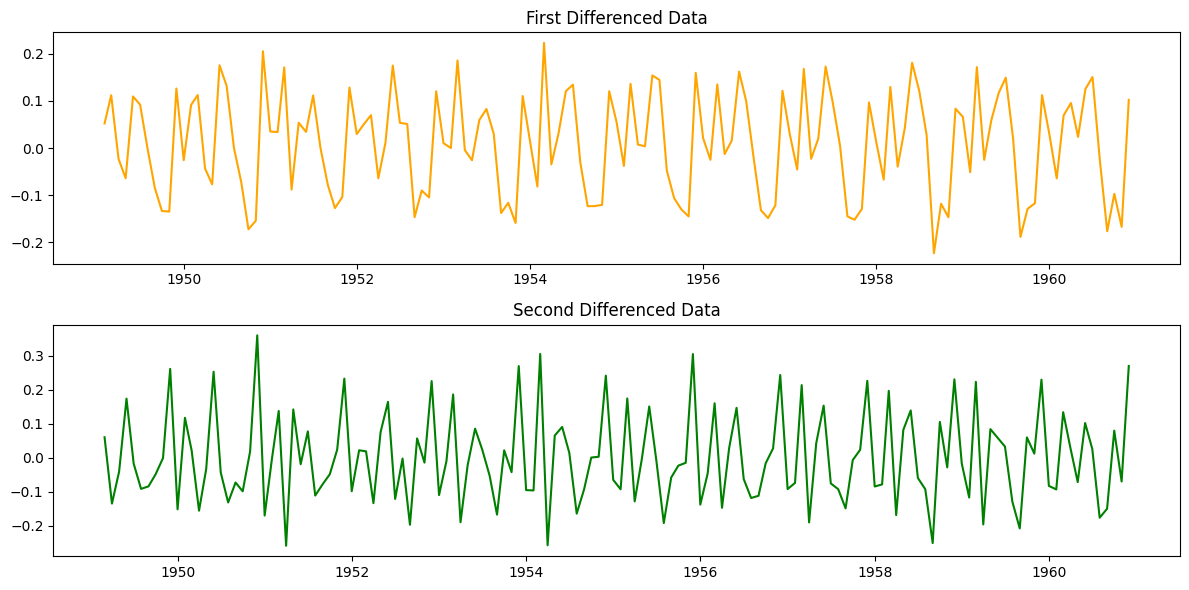


Results of Dickey-Fuller Test (Second Differenced Series):
Results of Dickey-Fuller Test:
Test Statistic                -8.196629e+00
p-value                        7.419305e-13
#Lags Used                     1.300000e+01
Number of Observations Used    1.280000e+02
Critical Value (1%)           -3.482501e+00
Critical Value (5%)           -2.884398e+00
Critical Value (10%)          -2.578960e+00
dtype: float64


In [ ]:
# Calcular la primera diferencia (derivada de orden uno)
data_log_diff = log_data - log_data.shift()

# Eliminar los NaN resultantes de la diferenciación
data_log_diff = data_log_diff.dropna()

# Visualizar la serie después de la primera diferenciación
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(log_data, label='Log-Transformed Data')
plt.title('Log-Transformed Data')

plt.subplot(2, 1, 2)
plt.plot(data_log_diff, color='orange', label='First Differenced Data')
plt.title('First Differenced Data')

plt.tight_layout()
plt.show()

# Realizar la prueba de Dickey-Fuller en la serie después de la primera diferenciación
print("\nResults of Dickey-Fuller Test (First Differenced Series):")
test_stationarity_2(data_log_diff)

# Calcular la segunda diferencia (derivada de orden dos)
data_log_diff_2 = data_log_diff - data_log_diff.shift()

# Eliminar los NaN resultantes de la segunda diferenciación
data_log_diff_2 = data_log_diff_2.dropna()

# Visualizar la serie después de la segunda diferenciación
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(data_log_diff, color='orange', label='First Differenced Data')
plt.title('First Differenced Data')

plt.subplot(2, 1, 2)
plt.plot(data_log_diff_2, color='green', label='Second Differenced Data')
plt.title('Second Differenced Data')

plt.tight_layout()
plt.show()

# Realizar la prueba de Dickey-Fuller en la serie después de la segunda diferenciación
print("\nResults of Dickey-Fuller Test (Second Differenced Series):")
test_stationarity_2(data_log_diff_2)

c) *Descomposición de la serie*:

La mayoría de series pueden descomponerse en tendencia, estacionalidad y residuo, como hemos visto en clase.

Utilizando la función *seasonal_decompose* del módulo de Python *statsmodels* podemos obtener estas tres componentes y por tanto, modelarlas por separado:

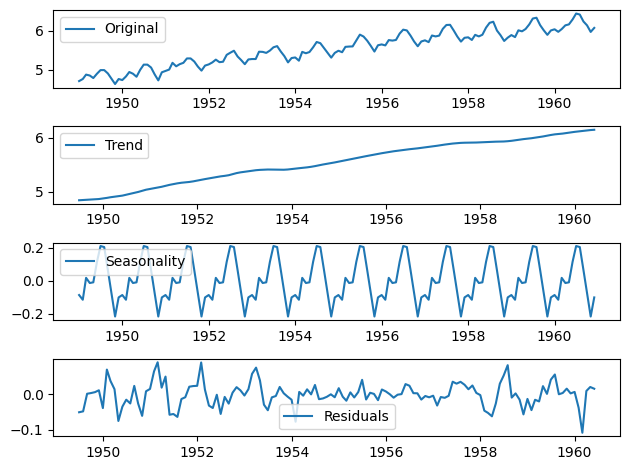

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(log_data)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(log_data, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

**PREGUNTAS**

1.   ¿Es la señal residual estacionaria? Realiza el test y comenta los resultados.



Puedes utilizar la función seasonal_decompose de statsmodels para descomponer tu serie temporal en tendencia, estacionalidad y residuo. Aquí está el código que realiza la descomposición y muestra las componentes:

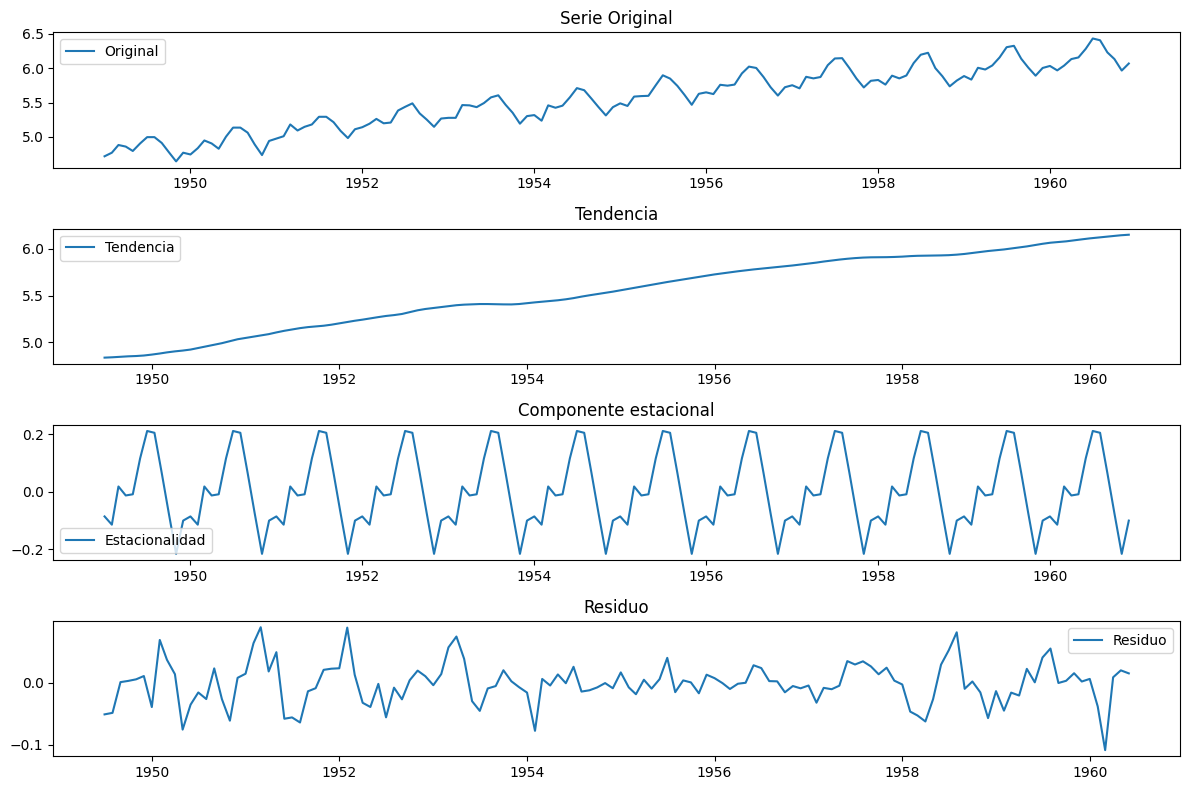


Results of Dickey-Fuller Test (Residual Series):
Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Supongamos que 'data' es tu serie temporal

# Transformación logarítmica
log_data = np.log(data)

# Descomposición de la serie
decomposition = seasonal_decompose(log_data)

# Obtener las componentes
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Visualizar las componentes
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(log_data, label='Original')
plt.legend(loc='best')
plt.title('Serie Original')

plt.subplot(412)
plt.plot(trend, label='Tendencia')
plt.legend(loc='best')
plt.title('Tendencia')

plt.subplot(413)
plt.plot(seasonal, label='Estacionalidad')
plt.legend(loc='best')
plt.title('Componente estacional')

plt.subplot(414)
plt.plot(residual, label='Residuo')
plt.legend(loc='best')
plt.title('Residuo')

plt.tight_layout()
plt.show()

# Realizar la prueba de Dickey-Fuller en la serie de residuos
residual = residual.dropna()  # Eliminar los NaN resultantes de la descomposición
print("\nResults of Dickey-Fuller Test (Residual Series):")
test_stationarity_2(residual)

No es estacionaria al tener una cierta tendencia aparte de que sigue el criterio que venimos haciendo de que su p-valor es menor que 5%.

## 1.5. Modelado ARIMA y predicción

Uno de los modelos clásicos para series temporales vistos en clase es el modelo ARIMA, que permite derivar *d* veces, y aplicar *p* coeficientes autorregresivos (AR) y *q* términos de error (shocks, provenientes de la parte MA) en la combinación lineal.  

Para determinar el valor de los parámetros *p* y *q*, podemos hacer uso de las funciones de autocorrelación (ACF) y autocorrelación parcial (PACF).

Si calculamos dichas funciones para la serie derivada previamente, obtenemos lo siguiente:

Text(0.5, 1.0, 'Partial Autocorrelation Function')

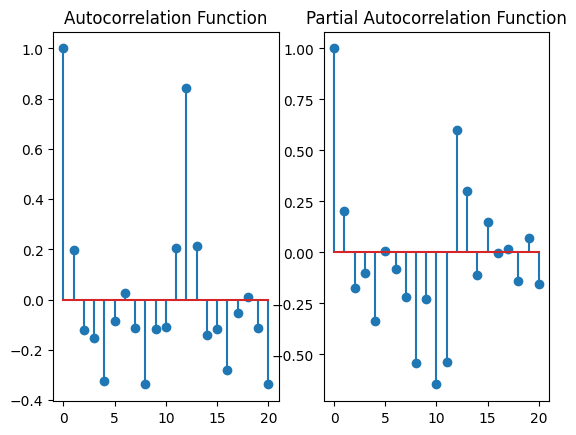

In [ ]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(data_log_diff, nlags=20, fft=False)
lag_pacf = pacf(data_log_diff, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.stem(lag_acf)
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.stem(lag_pacf)
plt.title('Partial Autocorrelation Function')

Podemos añadir además un intervalo de confianza a ambos lados del valor cero, de tal manera que el primer valor de retardo que cruce ese intervalo por arriba en la función de PACF será el valor de *p*, y de ACF, será *q*.

Para los niveles de confianza estándar, el valor del límite del intervalo de confianza al 95% es 1.96. Suponiendo desviación estándar unidad, el límite estaría en (-1.96/sqrt(N), 1.96/sqrt(N)), donde N es el número de puntos.

Si incluimos estos límites en la figura anterior, podemos obtener una buena aproximación de los valores de *p* y *q* para el modelo ARIMA:

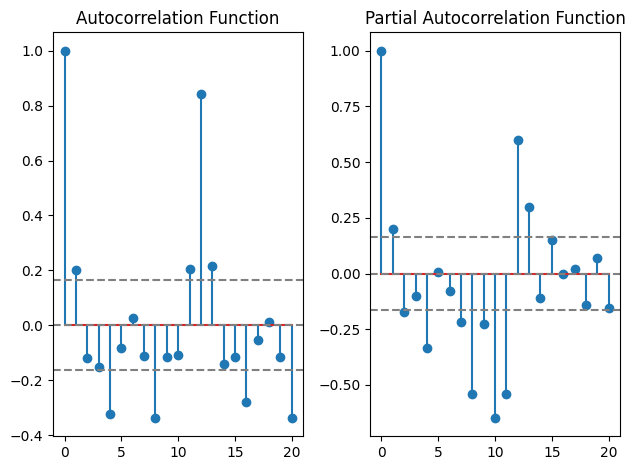

In [ ]:
#Plot ACF:
plt.subplot(121)
plt.stem(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

**PREGUNTAS**


1.   ¿Qué valores de *p* y *q* utilizarías para un primer modelo ARIMA de acuerdo a las representaciones anteriores?



El p representa el ultimo pico importamnte en PACF con desplazamiento p, que como, en este caso, el pico 1 es el ultimo pico relevante antes de que el siguiente caiga en el intervalo de confianza, entonces escogemos p=1.

Mientras que si seguimos la misma justificación para el q, el cual es el último pico importante en ACF es con desplazamiento q, escogeriamos el q=2.

Una vez elegidos los valores de *p* y *q*, podemos utilizar también la derivación interna de la clase ARIMA (*d*) o aplicarlo sobre la serie previamente derivada con valor de *d=0*.

A continuación, importamos el modelo ARIMA de la siguiente manera.

Este modelo tiene como argumentos los datos, y el orden:

model = ARIMA(datos, order = (p,d,q))

In [ ]:
from statsmodels.tsa.arima.model import ARIMA


**PREGUNTAS**


1.   A continuación, completa los valores de p, d y q y utiliza el siguiente código para ajustar un modelo tipo AR. Incluye el resultado en el informe de la práctica así como los valores elegidos. ¿Qué error de ajuste (RSS) se obtiene?

1) Empezamos probando con el valor dicho p=1 y comparamos con p's cada vez mayores hasta llegar a p=10, siendo d y q iguales a cero para que se cumpla que es un modelo AR. Vemos que cuando p=1 el error es 1.5971 y para p's cada vez mayores obtenemos un error menor, como sería p=10 con un error 0.9885, como se puede apreciar a continuación.

2.    Repite el código con los valores de los parámetros correspondientes para ajustar un modelo MA. Incluye el resultado en el informe de la práctica así como los valores elegidos. ¿Qué error de ajuste (RSS) se obtiene?

2) Ahora procedemos a hacer lo mismo que antes pero para el modelo MA, pero esta vez ajustando el p a cero y q distinto de cero para que se cumpla que sea un modelo MA, probamos con el q mencionado anteriormente q=2, el cual obtiene un error 4.1148, el cual es un error bastante alto y procedemos a ver si se puede mejorar, probando con q=5, q=10 y q=20, vemos que cuanto mayor es el q, menor es el error, al menos con los valores probados, los cuale es q=20 con un error 0.6683. Tambien podemos que el error decrece mas rapido que en el modelo AR cuando se pureba con valores entre 2 y 10, ya que por ejemplo, con q=5 obtenemos un error de 1.7023.

3.    Repite nuevamente el código para combinar los modelos anteriores (ARMA). Incluye el resultado en el informe de la práctica así como los valores elegidos. ¿Qué error de ajuste (RSS) se obtiene?

3) Para un modelo ARIMA empezamos calculando el error con el pico p=1 de la PACF, el pico q=2 de la ACF, y sin tener en cuenta derivaciones, es decir d=0, donde obtenemos un error con valor 1.4651. Para p=10, d=0 y q=10, obtenemos un error 0.6020. Si metemos que haya derivacion interna de ARIMA, por ejemplo, d=1, obtenemos que el error es 0.2988.

4.   De acuerdo a los valores de RSS, ¿cuál dirías que es el modelo que mejor se ajusta a los datos?

4) Como podemos observar, que para valores grandes y pequeños de p y de q, el mejor modelo es el ARIMA, y dentro del ARIMA es mejor cuando hay derivacion. De los dos restantes, para valores pequeños, ya sea de p o q segun corresponda, el mejor es AR en comparacion a MA, pero segun aumentan sus valores, empiezan a parecerse mas sus errores.

1) Empezamos probando con el valor dicho p=1 y comparamos con p's cada vez mayores hasta llegar a p=10, siendo d y q iguales a cero para que se cumpla que es un modelo AR. Vemos que cuando p=1 el error es 1.5971 y para p's cada vez mayores obtenemos un error menor, como sería p=10 con un error 0.9885, como se puede apreciar a continuación.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'RSS: 1.5974')

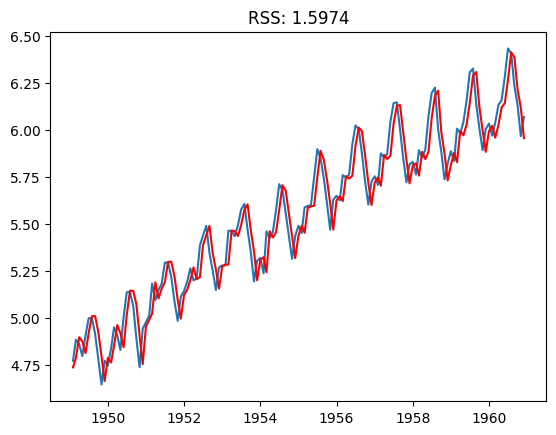

In [ ]:
p =1
d =0
q =0

# AR
model = ARIMA(log_data, order=(p, d, q))
results_AR = model.fit()
plt.plot(log_data[1:])
plt.plot(results_AR.fittedvalues[1:], color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues[1:]-log_data[1:])**2))
# RSS: Residual sum of squares

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'RSS: 0.9885')

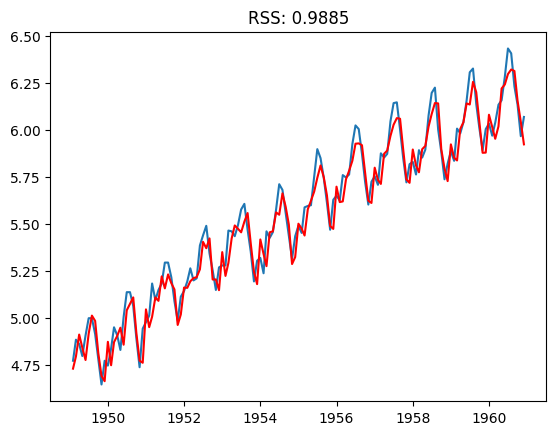

In [ ]:
p =10
d =0
q =0

# AR
model = ARIMA(log_data, order=(p, d, q))
results_AR = model.fit()
plt.plot(log_data[1:])
plt.plot(results_AR.fittedvalues[1:], color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues[1:]-log_data[1:])**2))
# RSS: Residual sum of squares

2) Ahora procedemos a hacer lo mismo que antes pero para el modelo MA, pero esta vez ajustando el p a cero y q distinto de cero para que se cumpla que sea un modelo MA, probamos con el q mencionado anteriormente q=2, el cual obtiene un error 4.1148, el cual es un error bastante alto y procedemos a ver si se puede mejorar, probando con q=5, q=10 y q=20, vemos que cuanto mayor es el q, menor es el error, al menos con los valores probados, los cuale es q=20 con un error 0.6683. Tambien podemos que el error decrece mas rapido que en el modelo AR cuando se pureba con valores entre 2 y 10, ya que por ejemplo, con q=5 obtenemos un error de 1.7023.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Text(0.5, 1.0, 'RSS: 4.1148')

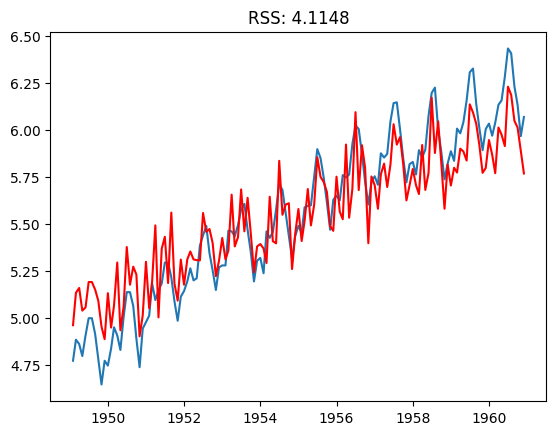

In [ ]:
p =0
d =0
q =2

# MA
model = ARIMA(log_data, order=(p, d, q))
results_AR = model.fit()
plt.plot(log_data[1:])
plt.plot(results_AR.fittedvalues[1:], color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues[1:]-log_data[1:])**2))
# RSS: Residual sum of squares

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Text(0.5, 1.0, 'RSS: 1.7023')

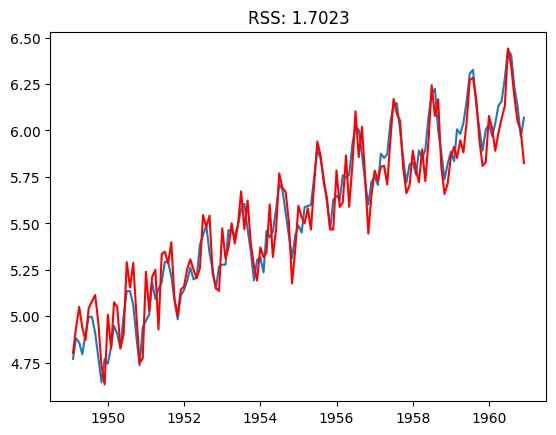

In [ ]:
p =0
d =0
q =5

# MA
model = ARIMA(log_data, order=(p, d, q))
results_AR = model.fit()
plt.plot(log_data[1:])
plt.plot(results_AR.fittedvalues[1:], color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues[1:]-log_data[1:])**2))
# RSS: Residual sum of squares

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals

Text(0.5, 1.0, 'RSS: 0.6683')

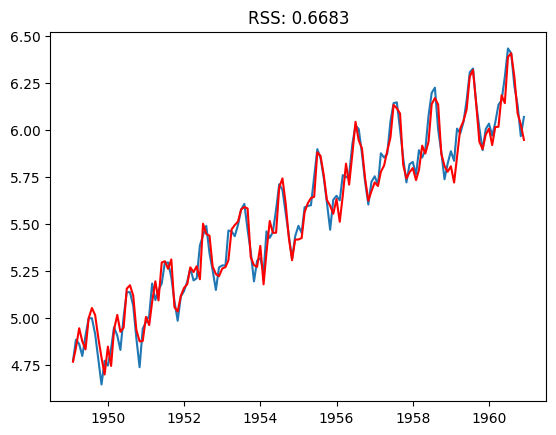

In [ ]:
p =0
d =0
q =20

# MA
model = ARIMA(log_data, order=(p, d, q))
results_AR = model.fit()
plt.plot(log_data[1:])
plt.plot(results_AR.fittedvalues[1:], color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues[1:]-log_data[1:])**2))
# RSS: Residual sum of squares

3) Para un modelo ARIMA empezamos calculando el error con el pico p=1 de la PACF, el pico q=2 de la ACF, y sin tener en cuenta derivaciones, es decir d=0, donde obtenemos un error con valor 1.4651. Para p=10, d=0 y q=10, obtenemos un error 0.6020. Si metemos que haya derivacion interna de ARIMA, por ejemplo, d=1, obtenemos que el error es 0.2988.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'RSS: 1.4651')

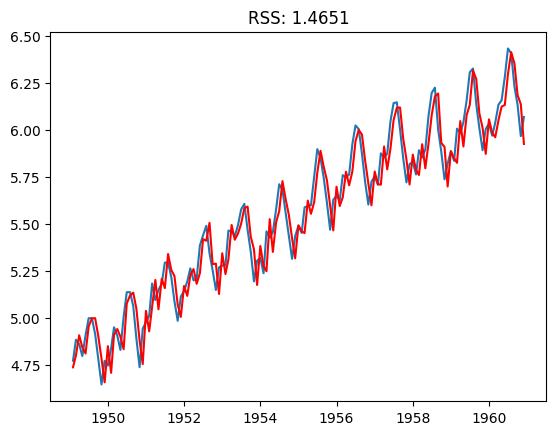

In [ ]:
p =1
d =0
q =2

# AR
model = ARIMA(log_data, order=(p, d, q))
results_AR = model.fit()
plt.plot(log_data[1:])
plt.plot(results_AR.fittedvalues[1:], color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues[1:]-log_data[1:])**2))
# RSS: Residual sum of squares

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. 

Text(0.5, 1.0, 'RSS: 0.6020')

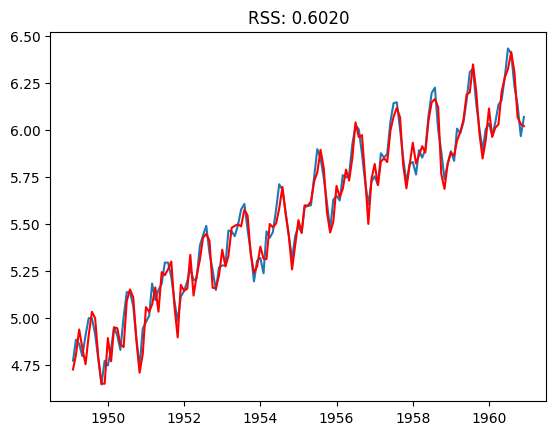

In [ ]:
p =10
d =0
q =10

# AR
model = ARIMA(log_data, order=(p, d, q))
results_AR = model.fit()
plt.plot(log_data[1:])
plt.plot(results_AR.fittedvalues[1:], color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues[1:]-log_data[1:])**2))
# RSS: Residual sum of squares

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals

Text(0.5, 1.0, 'RSS: 0.2988')

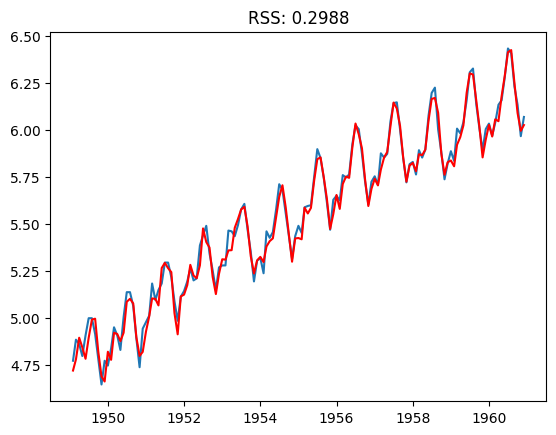

In [ ]:
p =10
d =1
q =10

# ARIMA
model = ARIMA(log_data, order=(p, d, q))
results_AR = model.fit()
plt.plot(log_data[1:])
plt.plot(results_AR.fittedvalues[1:], color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues[1:]-log_data[1:])**2))
# RSS: Residual sum of squares

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

Best AR Model Order: (3, 1, 3)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


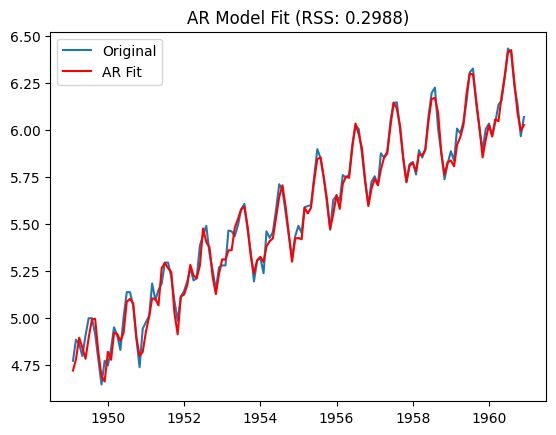

In [ ]:
# Función para encontrar el mejor modelo ARIMA mediante búsqueda de cuadrícula
def find_best_arima(data, max_p, max_d, max_q):
    best_aic = float("inf")
    best_order = None

    for p in range(max_p + 1):
        for d in range(max_d + 1):
            for q in range(max_q + 1):
                order = (p, d, q)
                try:
                    model = ARIMA(data, order=order)
                    results = model.fit()
                    aic = results.aic
                    if aic < best_aic:
                        best_aic = aic
                        best_order = order
                except:
                    continue

    return best_order

# Encontrar el mejor modelo AR
best_order_AR = find_best_arima(log_data, max_p=3, max_d=1, max_q=3)
print("Best AR Model Order:", best_order_AR)

# Ajustar el mejor modelo AR
model_AR = ARIMA(log_data, order=best_order_AR)
results_ARIMA = model_AR.fit()

# Visualizar el ajuste del modelo AR
plt.plot(log_data[1:], label='Original')
plt.plot(results_AR.fittedvalues[1:], color='red', label='AR Fit')
plt.title(f'AR Model Fit (RSS: {sum((results_AR.fittedvalues[1:]-log_data[1:])**2):.4f})')
plt.legend()
plt.show()

Por último, para predecir valores en el espacio original, tenemos que deshacer las transformaciones realizadas hasta el momento.

Primero, tomamos los valores ajustados por el modelo (predicciones) y los guardamos como serie temporal.

Estos valores empiezan en el segundo mes, puesto que hemos tomado diferencias (derivada) de orden 1.

In [ ]:
# Predicciones en el espacio original
predictions_ARIMA_log = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_log.head())


Month
1949-01-01    0.000000
1949-02-01    4.718499
1949-03-01    4.781031
1949-04-01    4.903700
1949-05-01    4.846776
dtype: float64


Las nuevas versiones de la librería, ya devuelven la operación de diferencias (en escala logarítmica) "eliminada", por lo que no necesitamos deshacerla con una suma acumulativa. Y por tanto, sólo necesitamos revertir la operación logarítmica. Para ello, aplicamos la función exponencial (inversa del logaritmo).

In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log[1:])

Podemos calcular el error cuadrático medio en el espacio original.

Text(0.5, 1.0, 'RMSE: nan')

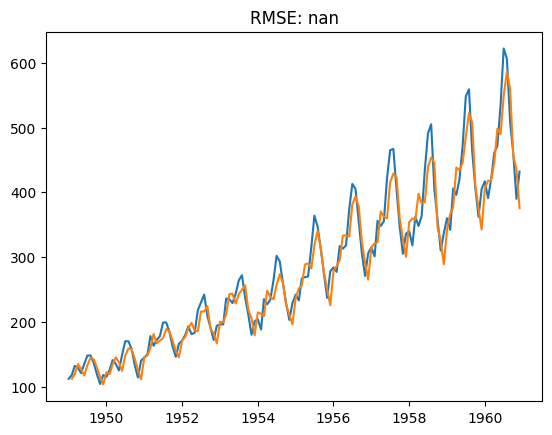

In [ ]:
plt.plot(data)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-data)**2)/len(data)))

# 2. Aplicación a otros datos: Acciones en bolsa S&P 500 stock data


Vamos a cargar ahora los datos sobre las acciones en bolsa del fichero *stocks_1yr.csv*:

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving stocks_1yr.csv to stocks_1yr (2).csv


Esta base de datos contiene los datos para las acciones (*stocks*) de un año, y por columnas, contiene los siguientes campos:


* Date - en formato: yy-mm-dd

* Open - precio de la acción en la apertura de la bolsa

* High - precio más alto alcanzado en el día

* Low Close - precio más bajo en el día

* Volume - Número de acciones vendidas/compradas

* Name - Nombre de la compañía

In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

def parser(x):
	return datetime.strptime(x, '%Y-%m-%d')

data = read_csv('stocks_1yr.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(data.head())

             open   high    low  close    volume Name
date                                                 
2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL


<ipython-input-70-bc01791b48a6>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
<ipython-input-70-bc01791b48a6>:8: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  data = read_csv('stocks_1yr.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


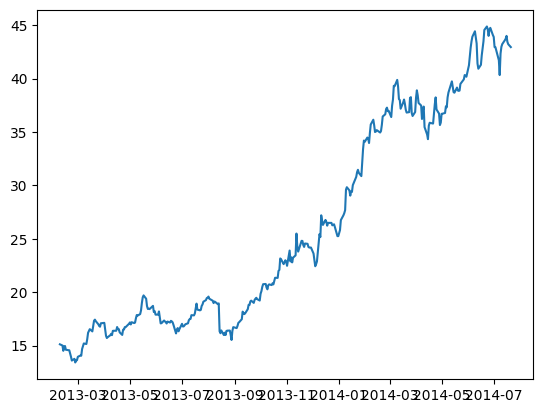

In [ ]:
from matplotlib import pyplot as plt
plt.plot(data.high)

**PREGUNTAS**

Utilizando las herramientas del apartado 1, realiza el análisis de esta serie (puedes utilizar un intervalo de ella o la serie completa).

En concreto:
1.   Analiza la estacionariedad de esta serie.
2.   ¿Qué transformaciones puedes realizar para hacerla más estacionaria? Prueba algunas y justifica si consigues una serie más estacionaria.
3.   Ajusta un modelo ARIMA, y calcula el error de predicción.



1) Por las graficas se puede observar que es no estacionaria, ya que tiene una tendencia ascendente.

Tambien se puede que no es estacionaria sabiendo que para ser estacionaria tiene que ser estable, pero, al menos por lo que se ve, no es estable, ya que es creciente y podria tender a infinito, aunque sea improbable que tienda a infinito, ya que no hay acciones en bolsa que vayan a infinito.

Un ultimo metodo para ver que no es estacionaria es, como se ha hecho con anterioridad, mediante el calculo del p-valor. Vemos que el p-valor obtenido es del 97%, muy por encima de cualquier posible valor que podemos considerar para que sea estacionaria.


2) Un primer metodo es haciendo la transformacion de los datos a traves del logaritmo, los cuales son mas estacionarios que la anterior, ya que se observa una tendencia pero mas leve que la anterior y un p-valor menor (92.25) que indica mas estacionariedad, aunque no suficientemente vajo para que sea estacionario.

Como se puede apreciar en el codigo y a estos datos para terminar de conseguir la estacionaliedad completa se aplican derivadas, donde podemos ver que ya no hay tendencia y se tiene un valor del p-valor igual a 4.148924e-30, que al ser tan pequeño indica que es estacionario.

Otra posible transformacion es el de la media movil, el cual si consigue una tendencia estacionaria, como se puede ver tanto graficamente como por su p-valor= 7.578519e-07, que aparece al final del todo (si se pone antes del apartado 3) da error en el apartado 3 el mismo código).

3) Si aplicamos ARIMA sobre los datos con p=1, d=0 y q=2 (la justificación de porque elegimos estos p y q son iguales a la que aplicamos al apartado 1), obtenemos un error de 114.0179. Pero si transformamos mediante el logaritmo y con p=1, d=0, y q=2 obtenemos un error de 0.1682 (si son p=1, d=0, y q=1, error de 0.1686), lo cual es un error mucho mejor. Tomando ahora p=10, d=1 y q=10, obtenemos un error de 0.1665, lo cual mejora aunque menos que antes. Por lo que podemos llegar a la misma conclusión de antes de que mejor cuan mayor es el q y p y que se tenga en cuenta diferenciabilidad. Tambien hemos tomado p=20, d=2 y q=20, pero hay algun tipo de problema, como se puede apreciar en la última gráfica antes de volver al apartado para hacer la tranformacion de la media movil.

In [ ]:
#### CÓDIGO AQUÍ ####

1)

             open   high    low  close    volume Name
date                                                 
2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL


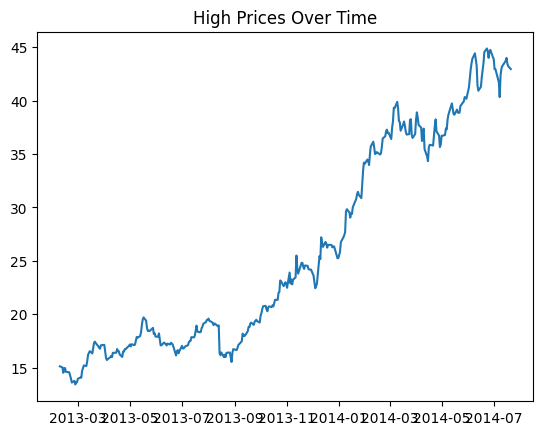

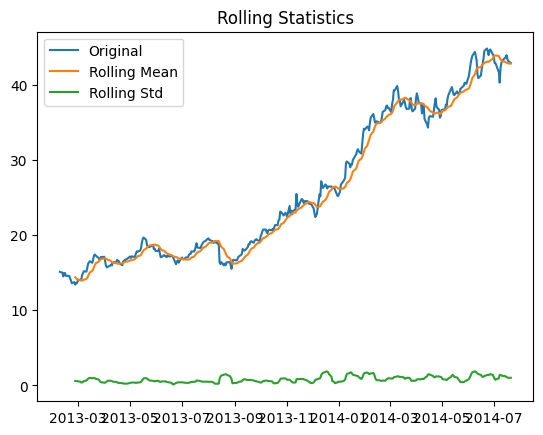

Results of Dickey-Fuller Test:
Test Statistic                   0.239126
p-value                          0.974373
#Lags Used                       3.000000
Number of Observations Used    360.000000
Critical Value (1%)             -3.448646
Critical Value (5%)             -2.869602
Critical Value (10%)            -2.571065
dtype: float64


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Mostrar las primeras filas de los datos
print(data.head())

# Visualizar la serie temporal (por ejemplo, la columna High)
plt.plot(data['high'])
plt.title('High Prices Over Time')
plt.show()

# Realizar la prueba de Dickey-Fuller para evaluar estacionariedad
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    # Plot rolling statistics:
    plt.plot(timeseries, label='Original')
    plt.plot(rolmean, label='Rolling Mean')
    plt.plot(rolstd, label='Rolling Std')
    plt.legend()
    plt.title('Rolling Statistics')
    plt.show()

    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

# Aplicar la prueba de estacionariedad a la serie original
test_stationarity(data['high'])


2) Para hacer la serie temporal más estacionaria, puedes probar algunas transformaciones comunes. Aquí hay algunas opciones que puedes considerar:

**Transformación Logarítmica:**

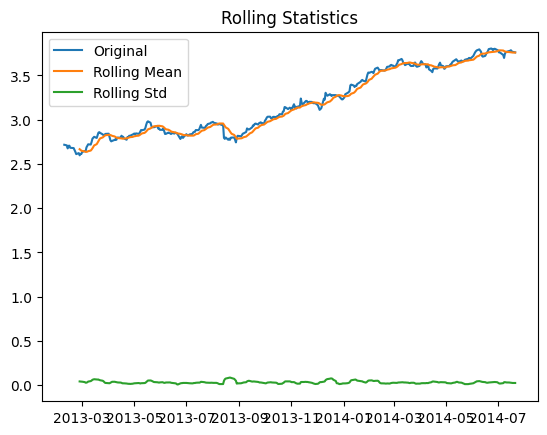

Results of Dickey-Fuller Test:
Test Statistic                  -0.320296
p-value                          0.922580
#Lags Used                       1.000000
Number of Observations Used    362.000000
Critical Value (1%)             -3.448544
Critical Value (5%)             -2.869557
Critical Value (10%)            -2.571041
dtype: float64


In [ ]:
data['high_log'] = np.log(data['high'])
test_stationarity(data['high_log'])

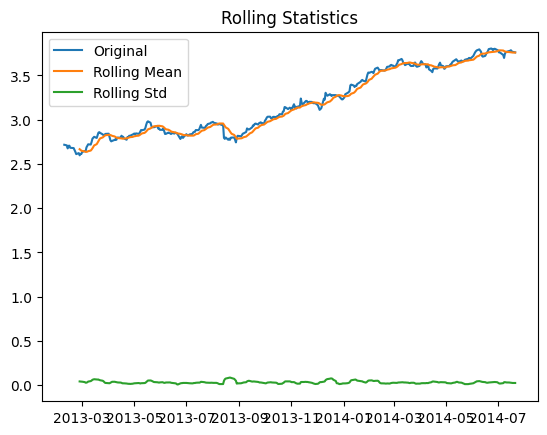

Results of Dickey-Fuller Test:
Test Statistic                  -0.320296
p-value                          0.922580
#Lags Used                       1.000000
Number of Observations Used    362.000000
Critical Value (1%)             -3.448544
Critical Value (5%)             -2.869557
Critical Value (10%)            -2.571041
dtype: float64


In [ ]:
log_data['high'] = np.log(data['high'])
test_stationarity(log_data['high'])

Esta transformación a menudo se aplica cuando la serie tiene una tendencia exponencial.

**Diferenciación de Primer Orden de datos logaritmicos:**


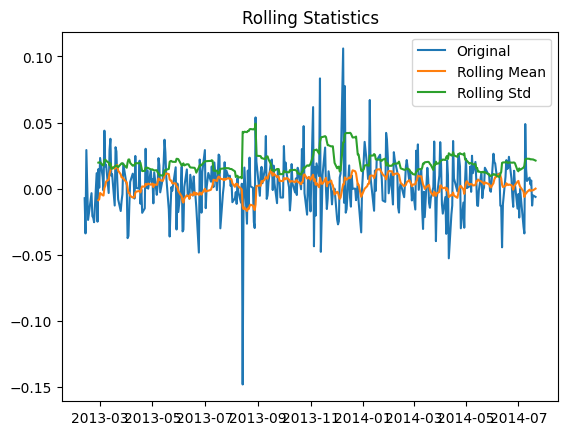

Results of Dickey-Fuller Test:
Test Statistic                -1.754962e+01
p-value                        4.148924e-30
#Lags Used                     0.000000e+00
Number of Observations Used    3.620000e+02
Critical Value (1%)           -3.448544e+00
Critical Value (5%)           -2.869557e+00
Critical Value (10%)          -2.571041e+00
dtype: float64


In [ ]:
# Calcular la primera diferencia (derivada de orden uno)
data_log_diff['high'] = log_data['high'] - log_data['high'].shift()
data_log_diff['high'] = data_log_diff['high'].dropna()  # Eliminar los valores NaN resultantes de la diferenciación
test_stationarity(data_log_diff['high'])

La diferenciación de primer orden es una técnica común para eliminar tendencias lineales.




**Diferenciación Estacional:**

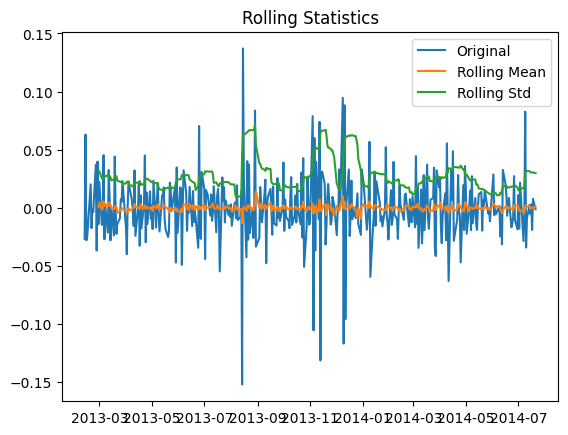

Results of Dickey-Fuller Test:
Test Statistic                -8.123640e+00
p-value                        1.138423e-12
#Lags Used                     1.600000e+01
Number of Observations Used    3.450000e+02
Critical Value (1%)           -3.449447e+00
Critical Value (5%)           -2.869954e+00
Critical Value (10%)          -2.571253e+00
dtype: float64


In [ ]:
# Calcular la primera diferencia (derivada de orden uno)
data_log_diff_2['high'] = data_log_diff['high'] - data_log_diff['high'].shift()
data_log_diff_2['high'] = data_log_diff_2['high'].dropna()  # Eliminar los valores NaN resultantes de la diferenciación
test_stationarity(data_log_diff_2['high'])

El codigo

data['high_seasonal_diff'] = data['high'].diff(12)  # Puede ajustar el valor de 12 según la estacionalidad
data['high_seasonal_diff'] = data['high_seasonal_diff'].dropna()
test_stationarity(data['high_seasonal_diff'])

Serviria para mayor orden de diferenciacion pero da el error

Results of Dickey-Fuller Test:

---------------------------------------------------------------------------

MissingDataError                          Traceback (most recent call last)

<ipython-input-41-0821d2873315> in <cell line: 3>()
      1 data['high_seasonal_diff'] = data['high'].diff(12)  # Puede ajustar el valor de 12 según la estacionalidad
      2 data['high_seasonal_diff'] = data['high_seasonal_diff'].dropna()
----> 3 test_stationarity(data['high_seasonal_diff'])

11 frames

/usr/local/lib/python3.10/dist-packages/statsmodels/base/data.py in _handle_constant(self, hasconst)
    132             exog_max = np.max(self.exog, axis=0)
    133             if not np.isfinite(exog_max).all():
--> 134                 raise MissingDataError('exog contains inf or nans')
    135             exog_min = np.min(self.exog, axis=0)
    136             const_idx = np.where(exog_max == exog_min)[0].squeeze()

MissingDataError: exog contains inf or nans

**Transformacion por moving avarege**

**3)** Para ajustar un modelo ARIMA y calcular el error de predicción, primero necesitamos determinar los parámetros p, d, y q que optimizan el ajuste del modelo.

Si aplicamos ARIMA sobre los datos con p=1, d=0 y q=2 (la justificación de porque elegimos estos p y q son iguales a la que aplicamos al apartado 1), obtenemos un error de 114.0179. Pero si transformamos mediante el logaritmo y con p=1, d=0, y q=2 obtenemos un error de 0.1682 (si son p=1, d=0, y q=1, error de 0.1686), lo cual es un error mucho mejor. Tomando ahora p=10, d=1 y q=10, obtenemos un error de 0.1665, lo cual mejora aunque menos que antes. Por lo que podemos llegar a la misma conclusión de antes de que mejor cuan mayor es el q y p y que se tenga en cuenta diferenciabilidad. Tambien hemos tomado p=20, d=2 y q=20, pero hay algun tipo de problema, como se puede apreciar en la última gráfica antes de volver al apartado para hacer la tranformacion de la media movil.

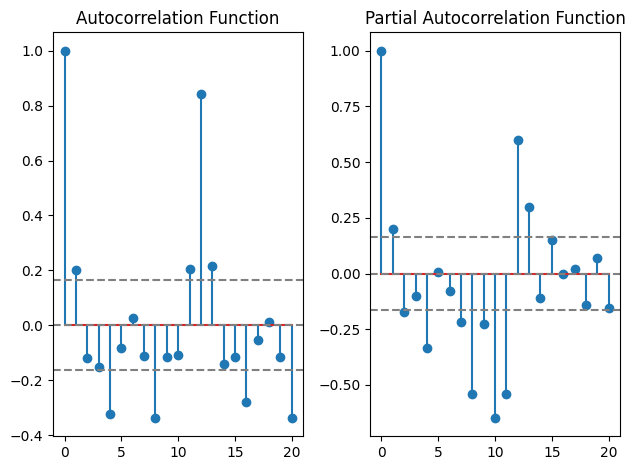

In [ ]:
#Plot ACF:
plt.subplot(121)
plt.stem(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'RSS: 114.0179')

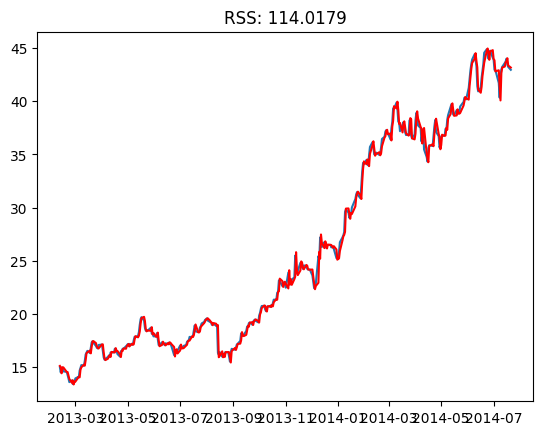

In [ ]:
p =1
d =0
q =2

# AR
model = ARIMA(data['high'], order=(p, d, q))
results_AR = model.fit()
plt.plot(data['high'][1:])
plt.plot(results_AR.fittedvalues[1:], color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues[1:]-data ['high'][1:])**2))
# RSS: Residual sum of squares

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'RSS: 0.1682')

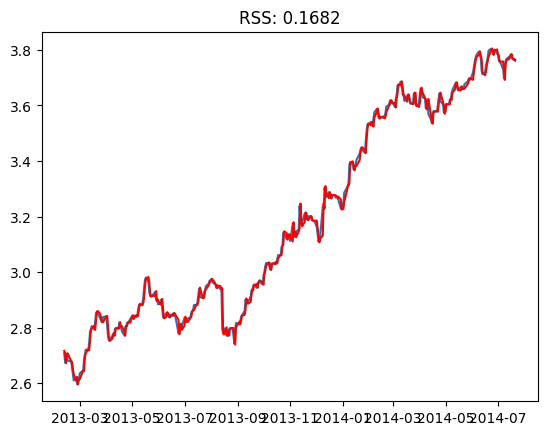

In [ ]:
#ARIMA
p =1
d =0
q =2

# AR
model = ARIMA(log_data['high'], order=(p, d, q))
results_AR = model.fit()
plt.plot(log_data['high'][1:])
plt.plot(results_AR.fittedvalues[1:], color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues[1:]-log_data ['high'][1:])**2))
# RSS: Residual sum of squares

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

Text(0.5, 1.0, 'RSS: 0.1665')

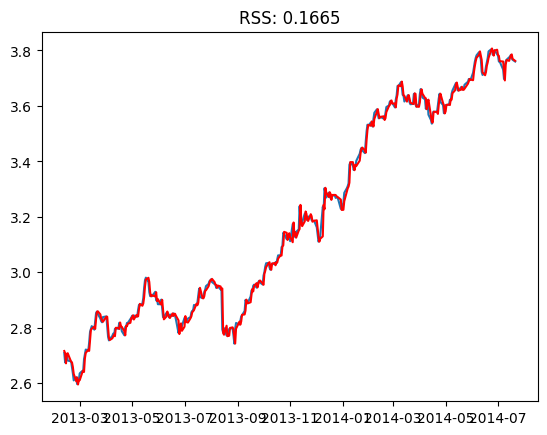

In [ ]:
#ARIMA
p =10
d =1
q =10

# AR
model = ARIMA(log_data['high'], order=(p, d, q))
results_AR = model.fit()
plt.plot(log_data['high'][1:])
plt.plot(results_AR.fittedvalues[1:], color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues[1:]-log_data ['high'][1:])**2))
# RSS: Residual sum of squares


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

Text(0.5, 1.0, 'RSS: 2.0298')

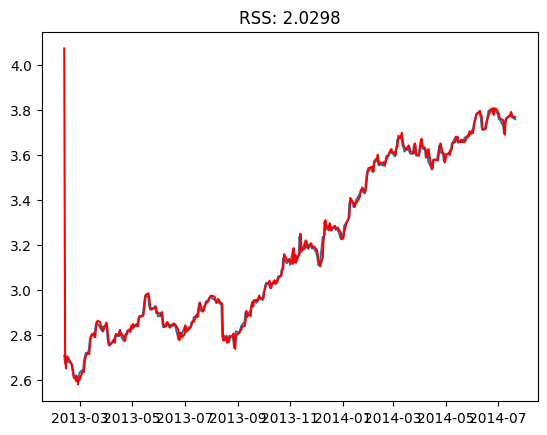

In [ ]:
#ARIMA
p =20
d =2
q =20

# AR
model = ARIMA(log_data['high'], order=(p, d, q))
results_AR = model.fit()
plt.plot(log_data['high'][1:])
plt.plot(results_AR.fittedvalues[1:], color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues[1:]-log_data ['high'][1:])**2))
# RSS: Residual sum of squares

**2) media movil**

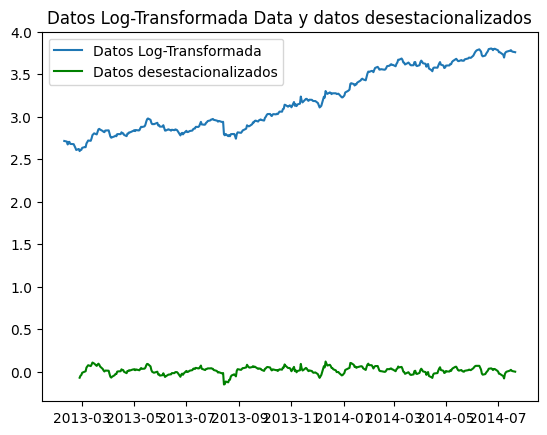

Results of Dickey-Fuller Test:
Test Statistic                -5.703557e+00
p-value                        7.578519e-07
#Lags Used                     2.000000e+00
Number of Observations Used    3.500000e+02
Critical Value (1%)           -3.449173e+00
Critical Value (5%)           -2.869833e+00
Critical Value (10%)          -2.571188e+00
dtype: float64


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Supongamos que 'data' es tu serie temporal

# Transformación logarítmica
log_data = np.log(data['high'])

# Aplicar media móvil con ventana de 12 meses
rolling_mean = log_data.rolling(window=12).mean()

# Eliminar los NaN resultantes de la media móvil
rolling_mean = rolling_mean.dropna()

# Restar la media móvil de la serie original logarítmica
deseasonalized_data = log_data - rolling_mean

# Eliminar los NaN y verificar la finitud de los valores
deseasonalized_data = deseasonalized_data.dropna()
if not np.isfinite(deseasonalized_data).all():
    raise ValueError("La serie desestacionalizada contiene valores no finitos.")

# Visualizar la serie original y la serie después de eliminar la influencia de la media móvil
plt.plot(log_data, label='Datos Log-Transformada')
plt.plot(deseasonalized_data, color='green', label='Datos desestacionalizados')
plt.legend(loc='best')
plt.title('Datos Log-Transformada Data y datos desestacionalizados')
plt.show()

# Realizar la prueba de Dickey-Fuller en la serie desestacionalizada
test_stationarity_2(deseasonalized_data)